## Introduction to Linear Algebra
References
https://github.com/mjbahmani/10-steps-to-become-a-data-scientist

1. [Introduction](#1)
1. [Basic Concepts](#2)
1. [Notation ](#2)
1. [Matrix Multiplication](#3)
    1. [Vector-Vector Products](#4)
    1. [Outer Product of Two Vectors](#5)
    1. [Matrix-Vector Products](#6)
    1. [Matrix-Matrix Products](#7)
1. [Identity Matrix](#8)
1. [Diagonal Matrix](#9)
1. [Transpose of a Matrix](#10)
1. [Symmetric Metrices](#11)
1. [The Trace](#12)
1. [Norms](#13)
1. [Linear Independence and Rank](#14)
    1. [Column Rank of a Matrix](#15)
    1. [Row Rank of a Matrix](#16)
    1. [Rank of a Matrix](#17)
1. [Subtraction and Addition of Metrices](#18)
    1. [Inverse](#19)
1. [Orthogonal Matrices](#20)
1. [Range and Nullspace of a Matrix](#21)
1. [Determinant](#22)
    1. [geometric interpretation of the determinant](#23)
1. [Tensors](#24)
1. [Hyperplane](#25)
1. [Eigenvalues and Eigenvectors](#30)
1. [Exercise](#31)
1. [Conclusion](#32)
1. [References](#33)

<a id="1"></a> <br>
#  1-Introduction

**Linear algebra** is the branch of mathematics that deals with **vector spaces**. good understanding of Linear Algebra is intrinsic to analyze Machine Learning algorithms, where so much happens behind the curtain.you have my word that I will try to keep mathematical formulas & derivations out of this completely mathematical topic and I try to cover all of subject that you need as data scientist.
<img src='https://camo.githubusercontent.com/e42ea0e40062cc1e339a6b90054bfbe62be64402/68747470733a2f2f63646e2e646973636f72646170702e636f6d2f6174746163686d656e74732f3339313937313830393536333530383733382f3434323635393336333534333331383532382f7363616c61722d766563746f722d6d61747269782d74656e736f722e706e67' height=200 width=700>

 <a id="top"></a> <br>

## 1-1 Import

In [1]:
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import linalg
from sklearn import svm
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import sys
import os

##  1-2 Setup

In [2]:
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.set_printoptions(suppress=True)

<a id="2"></a> <br>
# 2- Basic Concepts

The following system of equations:

$\begin{equation}
\begin{split}
4 x_1 - 5 x_2 & = -13 \\
 -2x_1 + 3 x_2 & = 9
\end{split}
\end{equation}$

We are looking for a unique solution for the two variables $x_1$ and $x_2$.  The system can be described as:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

$$
Ax=b
$$

as matrices:

$$A = \begin{bmatrix}
       4  & -5 \\[0.3em]
       -2 &  3 
     \end{bmatrix},\ 
 b = \begin{bmatrix}
       -13 \\[0.3em]
       9 
     \end{bmatrix}$$

A **scalar** is an element in a vector, containing a real number **value**. In a vector space model or a vector mapping of (symbolic, qualitative, or quantitative) properties the scalar holds the concrete value or property of a variable.

A **vector** is an array, tuple, or ordered list of scalars (or elements) of size $n$, with $n$ a positive integer. The **length** of the vector, that is the number of scalars in the vector, is also called the **order** of the vector.
<img src='https://cnx.org/resources/ba7a89a854e2336c540409615dbf47aa44155c56/pic002.png' height=400 width=400>

 <a id="top"></a> <br>

In [3]:
#3-dimensional vector in numpy
a = np.zeros((2, 3, 4))

#l = [[[ 0.,  0.,  0.,  0.],
    #      [ 0.,  0.,  0.,  0.],
     #     [ 0.,  0.,  0.,  0.]],
     #     [[ 0.,  0.,  0.,  0.],
    #      [ 0.,  0.,  0.,  0.],
     #     [ 0.,  0.,  0.,  0.]]]
a

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [4]:
# Declaring Vectors

x = [1, 2, 3]
y = [4, 5, 6]

print(type(x))

# This does'nt give the vector addition.
print(x + y)

# Vector addition using Numpy

z = np.add(x, y)
print(z)
print(type(z))

# Vector Cross Product
mul = np.cross(x, y)
print(mul)

<class 'list'>
[1, 2, 3, 4, 5, 6]
[5 7 9]
<class 'numpy.ndarray'>
[-3  6 -3]


**Vectorization** is the process of creating a vector from some data using some process.

Vectors of the length $n$ could be treated like points in $n$-dimensional space. One can calculate the distance between such points using measures like [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance). The similarity of vectors could also be calculated using [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity).
###### [Go to top](#top)

<a id="2"></a> <br>
## 3- Notation

A **matrix** is a list of vectors that all are of the same length. $A$ is a matrix with $m$ rows and $n$ columns, antries of $A$ are real numbers:

$A \in \mathbb{R}^{m \times n}$

A vector $x$ with $n$ entries of real numbers, could also be thought of as a matrix with $n$ rows and $1$ column, or as known as a **column vector**.

$x = \begin{bmatrix}
       x_1 \\[0.3em]
       x_2 \\[0.3em]
       \vdots \\[0.3em]
       x_n
     \end{bmatrix}$

Representing a **row vector**, that is a matrix with $1$ row and $n$ columns, we write $x^T$ (this denotes the transpose of $x$, see above).

$x^T = \begin{bmatrix}
       x_1 & x_2 & \cdots & x_n
     \end{bmatrix}$

We use the notation $a_{ij}$ (or $A_{ij}$, $A_{i,j}$, etc.) to denote the entry of $A$ in the $i$th row and
$j$th column:

$A = \begin{bmatrix}
       a_{11} & a_{12} & \cdots & a_{1n} \\[0.3em]
       a_{21} & a_{22} & \cdots & a_{2n} \\[0.3em]
       \vdots & \vdots & \ddots & \vdots \\[0.3em]
       a_{m1} & a_{m2} & \cdots & a_{mn} 
     \end{bmatrix}$

We denote the $j$th column of $A$ by $a_j$ or $A_{:,j}$:

$A = \begin{bmatrix}
       \big| & \big| &  & \big| \\[0.3em]
       a_{1} & a_{2} & \cdots & a_{n} \\[0.3em]
       \big| & \big| &  & \big|  
     \end{bmatrix}$

We denote the $i$th row of $A$ by $a_i^T$ or $A_{i,:}$:

$A = \begin{bmatrix}
      -- & a_1^T  & -- \\[0.3em]
       -- & a_2^T  & -- \\[0.3em]
          & \vdots &  \\[0.3em]
       -- & a_m^T  & -- 
     \end{bmatrix}$

A $n \times m$ matrix is a **two-dimensional** array with $n$ rows and $m$ columns.
###### [Go to top](#top)

<a id="3"></a> <br>
## 4-Matrix Multiplication

The result of the multiplication of two matrixes $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{n \times p}$ is the matrix:

In [5]:
# initializing matrices 
x = np.array([[1, 2], [4, 5]]) 
y = np.array([[7, 8], [9, 10]])

$C = AB \in \mathbb{R}^{m \times n}$

That is, we are multiplying the columns of $A$ with the rows of $B$:

$C_{ij}=\sum_{k=1}^n{A_{ij}B_{kj}}$
<img src='https://cdn.britannica.com/06/77706-004-31EE92F3.jpg'>

The number of columns in $A$ must be equal to the number of rows in $B$.

###### [Go to top](#top)

In [6]:
# using add() to add matrices 
print ("The element wise addition of matrix is : ") 
print (np.add(x,y)) 

The element wise addition of matrix is : 
[[ 8 10]
 [13 15]]


In [7]:
# using subtract() to subtract matrices 
print ("The element wise subtraction of matrix is : ") 
print (np.subtract(x,y)) 

The element wise subtraction of matrix is : 
[[-6 -6]
 [-5 -5]]


In [8]:
# using divide() to divide matrices 
print ("The element wise division of matrix is : ") 
print (np.divide(x,y)) 

The element wise division of matrix is : 
[[0.1429 0.25  ]
 [0.4444 0.5   ]]


In [9]:
# using multiply() to multiply matrices element wise 
print ("The element wise multiplication of matrix is : ") 
print (np.multiply(x,y))

The element wise multiplication of matrix is : 
[[ 7 16]
 [36 50]]


<a id="4"></a> <br>
## 4-1 Vector-Vector Products

Inner or Dot **Product** of Two Vectors.

For two vectors $x, y \in \mathbb{R}^n$, the **inner product** or **dot product** $x^T y$ is a real number:

$x^T y \in \mathbb{R} = \begin{bmatrix}
       x_1 & x_2 & \cdots & x_n
     \end{bmatrix} \begin{bmatrix}
       y_1 \\[0.3em]
       y_2 \\[0.3em]
       \vdots \\[0.3em]
       y_n
     \end{bmatrix} = \sum_{i=1}^{n}{x_i y_i}$

The **inner products** are a special case of matrix multiplication.

It is always the case that $x^T y = y^T x$.

##### Example

To calculate the inner product of two vectors $x = [1 2 3 4]$ and $y = [5 6 7 8]$, we can loop through the vector and multiply and sum the scalars (this is simplified code):

In [10]:
x = (1, 2, 3, 4)
y = (5, 6, 7, 8)
n = len(x)
if n == len(y):
    result = 0
    for i in range(n):
        result += x[i] * y[i]
    print(result)

70


It is clear that in the code above we could change line 7 to `result += y[i] * x[i]` without affecting the result.
###### [Go to top](#top)

We can use the *numpy* module to apply the same operation, to calculate the **inner product**. We import the *numpy* module and assign it a name *np* for the following code:

We define the vectors $x$ and $y$ using *numpy*:

In [11]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
print("x:", x)
print("y:", y)

x: [1 2 3 4]
y: [5 6 7 8]


We can now calculate the $dot$ or $inner product$ using the *dot* function of *numpy*:

In [12]:
np.dot(x, y)

70

The order of the arguments is irrelevant:

In [13]:
np.dot(y, x)

70

Note that both vectors are actually **row vectors** in the above code. We can transpose them to column vectors by using the *shape* property:

In [14]:
print("x:", x)
x.shape = (4, 1)
print("xT:", x)
print("y:", y)
y.shape = (4, 1)
print("yT:", y)

x: [1 2 3 4]
xT: [[1]
 [2]
 [3]
 [4]]
y: [5 6 7 8]
yT: [[5]
 [6]
 [7]
 [8]]


In fact, in our understanding of Linear Algebra, we take the arrays above to represent **row vectors**. *Numpy* treates them differently.

We see the issues when we try to transform the array objects. Usually, we can transform a row vector into a column vector in *numpy* by using the *T* method on vector or matrix objects:
###### [Go to top](#top)

In [15]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
print("x:", x)
print("y:", y)
print("xT:", x.T)
print("yT:", y.T)

x: [1 2 3 4]
y: [5 6 7 8]
xT: [1 2 3 4]
yT: [5 6 7 8]


The problem here is that this does not do, what we expect it to do. It only works, if we declare the variables not to be arrays of numbers, but in fact a matrix:

In [16]:
x = np.array([[1, 2, 3, 4]])
y = np.array([[5, 6, 7, 8]])
print("x:", x)
print("y:", y)
print("xT:", x.T)
print("yT:", y.T)


x: [[1 2 3 4]]
y: [[5 6 7 8]]
xT: [[1]
 [2]
 [3]
 [4]]
yT: [[5]
 [6]
 [7]
 [8]]


Note that the *numpy* functions *dot* and *outer* are not affected by this distinction. We can compute the dot product using the mathematical equation above in *numpy* using the new $x$ and $y$ row vectors:
###### [Go to top](#top)

In [17]:
print("x:", x)
print("y:", y.T)
np.dot(x, y.T)

x: [[1 2 3 4]]
y: [[5]
 [6]
 [7]
 [8]]


array([[70]])

Or by reverting to:

In [18]:
print("x:", x.T)
print("y:", y)
np.dot(y, x.T)

x: [[1]
 [2]
 [3]
 [4]]
y: [[5 6 7 8]]


array([[70]])

To read the result from this array of arrays, we would need to access the value this way:

In [19]:
np.dot(y, x.T)[0][0]

70

<a id="5"></a> <br>
## 4-2 Outer Product of Two Vectors

For two vectors $x \in \mathbb{R}^m$ and $y \in \mathbb{R}^n$, where $n$ and $m$ do not have to be equal, the **outer product** of $x$ and $y$ is:

$xy^T \in \mathbb{R}^{m\times n}$

The **outer product** results in a matrix with $m$ rows and $n$ columns by $(xy^T)_{ij} = x_i y_j$:

$xy^T \in \mathbb{R}^{m\times n} = \begin{bmatrix}
       x_1 \\[0.3em]
       x_2 \\[0.3em]
       \vdots \\[0.3em]
       x_n
     \end{bmatrix} \begin{bmatrix}
       y_1 & y_2 & \cdots & y_n
     \end{bmatrix} = \begin{bmatrix}
       x_1 y_1 & x_1 y_2 & \cdots & x_1 y_n \\[0.3em]
       x_2 y_1 & x_2 y_2 & \cdots & x_2 y_n \\[0.3em]
       \vdots  & \vdots  & \ddots & \vdots \\[0.3em]
       x_m y_1 & x_m y_2 & \cdots & x_m y_n \\[0.3em]
     \end{bmatrix}$

Some useful property of the outer product: assume $\mathbf{1} \in \mathbb{R}^n$ is an $n$-dimensional vector of scalars with the value $1$. Given a matrix $A \in \mathbb{R}^{m\times n}$ with all columns equal to some vector $x \in \mathbb{R}^m$, using the outer product $A$ can be represented as:

$A = \begin{bmatrix}
       \big| & \big| &  & \big| \\[0.3em]
       x & x & \cdots & x \\[0.3em]
       \big| & \big| &  & \big|  
     \end{bmatrix} = \begin{bmatrix}
       x_1    & x_1    & \cdots & x_1    \\[0.3em]
       x_2    & x_2    & \cdots & x_2    \\[0.3em]
       \vdots & \vdots & \ddots & \vdots \\[0.3em]
       x_m    &x_m     & \cdots & x_m
     \end{bmatrix} = \begin{bmatrix}
       x_1 \\[0.3em]
       x_2 \\[0.3em]
       \vdots \\[0.3em]
       x_m
     \end{bmatrix} \begin{bmatrix}
       1 & 1 & \cdots & 1
     \end{bmatrix} = x \mathbf{1}^T$

In [20]:
x = np.array([[1, 2, 3, 4]])
print("x:", x)
print("xT:", np.reshape(x, (4, 1)))
print("xT:", x.T)
print("xT:", x.transpose())

x: [[1 2 3 4]]
xT: [[1]
 [2]
 [3]
 [4]]
xT: [[1]
 [2]
 [3]
 [4]]
xT: [[1]
 [2]
 [3]
 [4]]


Example
###### [Go to top](#top)

We can now compute the **outer product** by multiplying the column vector $x$ with the row vector $y$:

In [21]:
x = np.array([[1, 2, 3, 4]])
y = np.array([[5, 6, 7, 8]])
x.T * y

array([[ 5,  6,  7,  8],
       [10, 12, 14, 16],
       [15, 18, 21, 24],
       [20, 24, 28, 32]])

*Numpy* provides an *outer* function that does all that:

In [22]:
np.outer(x, y)

array([[ 5,  6,  7,  8],
       [10, 12, 14, 16],
       [15, 18, 21, 24],
       [20, 24, 28, 32]])

Note, in this simple case using the simple arrays for the data structures of the vectors does not affect the result of the *outer* function:

In [23]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
np.outer(x, y)

array([[ 5,  6,  7,  8],
       [10, 12, 14, 16],
       [15, 18, 21, 24],
       [20, 24, 28, 32]])

<a id="6"></a> <br>
## 4-3 Matrix-Vector Products

Assume a matrix $A \in \mathbb{R}^{m\times n}$ and a vector $x \in \mathbb{R}^n$ the product results in a vector $y = Ax \in \mathbb{R}^m$.

$Ax$ could be expressed as the dot product of row $i$ of matrix $A$ with the column value $j$ of vector $x$. Let us first consider matrix multiplication with a scalar:
###### [Go to top](#top)

$A = \begin{bmatrix}
       1 & 2 \\[0.3em]
       3 & 4
     \end{bmatrix}$

We can compute the product of $A$ with a scalar $n = 2$ as:

$A = \begin{bmatrix}
       1 * n & 2 * n \\[0.3em]
       3 * n & 4 * n
     \end{bmatrix} = \begin{bmatrix}
       1 * 2 & 2 * 2 \\[0.3em]
       3 * 2 & 4 * 2
     \end{bmatrix} = \begin{bmatrix}
       2 & 4 \\[0.3em]
       6 & 8
     \end{bmatrix} $

Using *numpy* this can be achieved by:

In [24]:
import numpy as np
A = np.array([[4, 5, 6],
             [7, 8, 9]])
A * 2

array([[ 8, 10, 12],
       [14, 16, 18]])

Assume that we have a column vector $x$:

$x = \begin{bmatrix}
       1 \\[0.3em]
       2 \\[0.3em]
       3 
     \end{bmatrix}$

To be able to multiply this vector with a matrix, the number of columns in the matrix must correspond to the number of rows in the column vector. The matrix $A$ must have $3$ columns, as for example: 

$A = \begin{bmatrix}
       4 & 5 & 6\\[0.3em]
       7 & 8 & 9
     \end{bmatrix}$

To compute $Ax$, we multiply row $1$ of the matrix with column $1$ of $x$:

$\begin{bmatrix}
  4 & 5 & 6
 \end{bmatrix}
 \begin{bmatrix}
 1 \\[0.3em]
 2 \\[0.3em]
 3 
\end{bmatrix} = 4 * 1 + 5 * 2 + 6 * 3 = 32 $

We do the compute the dot product of row $2$ of $A$ and column $1$ of $x$:

$\begin{bmatrix}
  7 & 8 & 9
 \end{bmatrix}
 \begin{bmatrix}
 1 \\[0.3em]
 2 \\[0.3em]
 3 
\end{bmatrix} = 7 * 1 + 8 * 2 + 9 * 3 = 50 $

The resulting column vector $Ax$ is:

$Ax = \begin{bmatrix}
       32 \\[0.3em]
       50 
     \end{bmatrix}$
     

Using *numpy* we can compute $Ax$:

In [25]:
A = np.array([[4, 5, 6],
             [7, 8, 9]])
x = np.array([1, 2, 3])
A.dot(x)

array([32, 50])

We can thus describe the product writing $A$ by rows as:
 
 <a id="top"></a> <br>

$y = Ax = \begin{bmatrix}
 -- & a_1^T  & -- \\[0.3em]
 -- & a_2^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_m^T  & -- 
\end{bmatrix} x = \begin{bmatrix}
 a_1^T x \\[0.3em]
 a_2^T x \\[0.3em]
 \vdots \\[0.3em]
 a_m^T x 
\end{bmatrix}$

This means that the $i$th scalar of $y$ is the inner product of the $i$th row of $A$ and $x$, that is $y_i = a_i^T x$.

If we write $A$ in column form, then:

$y = Ax =
\begin{bmatrix}
 \big| & \big| &  & \big| \\[0.3em]
 a_1 & a_2 & \cdots & a_n \\[0.3em]
 \big| & \big| &  & \big|  
\end{bmatrix}
\begin{bmatrix}
 x_1 \\[0.3em]
 x_2 \\[0.3em]
 \vdots \\[0.3em]
 x_n
\end{bmatrix} =
\begin{bmatrix}
 a_1
\end{bmatrix} x_1 + 
\begin{bmatrix}
 a_2
\end{bmatrix} x_2 + \dots +
\begin{bmatrix}
 a_n
\end{bmatrix} x_n
$

In this case $y$ is a **[linear combination](https://en.wikipedia.org/wiki/Linear_combination)** of the *columns* of $A$, the coefficients taken from $x$.

The above examples multiply be the right with a column vector. One can multiply on the left by a row vector as well, $y^T = x^T A$ for $A \in \mathbb{R}^{m\times n}$, $x\in \mathbb{R}^m$, $y \in \mathbb{R}^n$. There are two ways to express $y^T$, with $A$ expressed by its columns, with $i$th scalar of $y^T$ corresponds to the inner product of $x$ and the $i$th column of $A$:

$y^T = x^T A = x^t \begin{bmatrix}
 \big| & \big| &  & \big| \\[0.3em]
 a_1 & a_2 & \cdots & a_n \\[0.3em]
 \big| & \big| &  & \big|  
\end{bmatrix} = 
\begin{bmatrix}
 x^T a_1 & x^T a_2 & \dots & x^T a_n   
\end{bmatrix}$

One can express $A$ by rows, where $y^T$ is a linear combination of the rows of $A$ with the scalars from $x$.

$\begin{equation}
\begin{split}
y^T & = x^T A \\
    & = \begin{bmatrix}
 x_1 & x_2 & \dots & x_n   
\end{bmatrix}
\begin{bmatrix}
 -- & a_1^T  & -- \\[0.3em]
 -- & a_2^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_m^T  & -- 
\end{bmatrix} \\
   & = x_1 \begin{bmatrix}-- & a_1^T  & --\end{bmatrix} + x_2 \begin{bmatrix}-- & a_2^T  & --\end{bmatrix} + \dots + x_n \begin{bmatrix}-- & a_n^T  & --\end{bmatrix}
\end{split}
\end{equation}$

###### [Go to top](#top)

<a id="7"></a> <br>
## 4-4 Matrix-Matrix Products

One can view matrix-matrix multiplication $C = AB$ as a set of vector-vector products. The $(i,j)$th entry of $C$ is the inner product of the $i$th row of $A$ and the $j$th column of $B$:

In [26]:
matrix1 = np.matrix(
    [[0, 4],
     [2, 0]]
)
matrix2 = np.matrix(
    [[-1, 2],
     [1, -2]]
)

In [27]:
matrix1 + matrix2

matrix([[-1,  6],
        [ 3, -2]])

In [28]:
matrix1 - matrix2

matrix([[1, 2],
        [1, 2]])

### 4-4-1  Multiplication
To multiply two matrices with numpy, you can use the np.dot method:

In [29]:
np.dot(matrix1, matrix2)

matrix([[ 4, -8],
        [-2,  4]])

In [30]:

matrix1 * matrix2

matrix([[ 4, -8],
        [-2,  4]])

$C = AB =
\begin{bmatrix}
 -- & a_1^T  & -- \\[0.3em]
 -- & a_2^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_m^T  & -- 
\end{bmatrix}
\begin{bmatrix}
 \big| & \big| &  & \big| \\[0.3em]
 b_1 & b_2 & \cdots & b_p \\[0.3em]
 \big| & \big| &  & \big|  
\end{bmatrix} = 
\begin{bmatrix}
 a_1^T b_1 & a_1^T b_2 & \cdots & a_1^T b_p \\[0.3em]
 a_2^T b_1 & a_2^T b_2 & \cdots & a_2^T b_p \\[0.3em]
 \vdots    & \vdots    & \ddots & \vdots    \\[0.3em]
 a_m^T b_1 & a_m^T b_2 & \cdots & a_m^T b_p 
\end{bmatrix}$

Here $A \in \mathbb{R}^{m\times n}$ and $B \in \mathbb{R}^{n\times p}$, $a_i \in \mathbb{R}^n$ and $b_j \in \mathbb{R}^n$, and $A$ is represented by rows, $B$ by columns.

If we represent $A$ by columns and $B$ by rows, then $AB$ is the sum of the outer products:

$C = AB =
\begin{bmatrix}
 \big| & \big| &  & \big| \\[0.3em]
 a_1 & a_2 & \cdots & a_n \\[0.3em]
 \big| & \big| &  & \big|  
\end{bmatrix}
\begin{bmatrix}
 -- & b_1^T  & -- \\[0.3em]
 -- & b_2^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & b_n^T  & -- 
\end{bmatrix}
= \sum_{i=1}^n a_i b_i^T
$

This means that $AB$ is the sum over all $i$ of the outer product of the $i$th column of $A$ and the $i$th row of $B$.

One can interpret matrix-matrix operations also as a set of matrix-vector products. Representing $B$ by columns, the columns of $C$ are matrix-vector products between $A$ and the columns of $B$:

$C = AB = A
\begin{bmatrix}
 \big| & \big| &  & \big| \\[0.3em]
 b_1 & b_2 & \cdots & b_p \\[0.3em]
 \big| & \big| &  & \big|  
\end{bmatrix} = 
\begin{bmatrix}
 \big| & \big| &  & \big| \\[0.3em]
 A b_1 & A b_2 & \cdots & A b_p \\[0.3em]
 \big| & \big| &  & \big|  
\end{bmatrix}
$

In this interpretation the $i$th column of $C$ is the matrix-vector product with the vector on the right, i.e. $c_i = A b_i$.

Representing $A$ by rows, the rows of $C$ are the matrix-vector products between the rows of $A$ and $B$:

$C = AB = \begin{bmatrix}
 -- & a_1^T  & -- \\[0.3em]
 -- & a_2^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_m^T  & -- 
\end{bmatrix}
B = 
\begin{bmatrix}
 -- & a_1^T B & -- \\[0.3em]
 -- & a_2^T B & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_n^T B & -- 
\end{bmatrix}$

The $i$th row of $C$ is the matrix-vector product with the vector on the left, i.e. $c_i^T = a_i^T B$.

#### Notes on Matrix-Matrix Products

**Matrix multiplication is associative:** $(AB)C = A(BC)$

**Matrix multiplication is distributive:** $A(B + C) = AB + AC$

**Matrix multiplication is, in general, not commutative;** It can be the case that $AB \neq BA$. (For example, if $A \in \mathbb{R}^{m\times n}$ and $B \in \mathbb{R}^{n\times q}$, the matrix product $BA$ does not even exist if $m$ and $q$ are not equal!)
###### [Go to top](#top)

<a id="8"></a> <br>
## 5- Identity Matrix

The **identity matrix** $I \in \mathbb{R}^{n\times n}$ is a square matrix with the value $1$ on the diagonal and $0$ everywhere else:

In [31]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

$I_{ij} = \left\{
\begin{array}{lr}
 1 & i = j\\
 0 & i \neq j
\end{array}
\right.
$

For all $A \in \mathbb{R}^{m\times n}$:

$AI = A = IA$

In the equation above multiplication has to be made possible, which means that in the portion $AI = A$ the dimensions of $I$ have to be $n\times n$, while in $A = IA$ they have to be $m\times m$.

We can generate an *identity matrix* in *numpy* using:

In [32]:
A = np.array([[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8],
              [9, 10, 11]])
print("A:", A)

A: [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


We can ask for the shape of $A$:

In [33]:
A.shape

(4, 3)

The *shape* property of a matrix contains the $m$ (number of rows) and $n$ (number of columns) properties in a tuple, in that particular order. We can create an identity matrix for the use in $AI$ by using the $n$ value: 

In [34]:
np.identity(A.shape[1], dtype="int")

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Note that we specify the *dtype* parameter to *identity* as *int*, since the default would return a matrix of *float* values.

To generate an identity matrix for the use in $IA$ we would use the $m$ value:

In [35]:
np.identity(A.shape[0], dtype="int")

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

We can compute the dot product of $A$ and its identity matrix $I$:

In [36]:
n = A.shape[1]
I = np.array(np.identity(n, dtype="int"))
np.dot(A, I)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

The same is true for the other direction:

In [37]:
m = A.shape[0]
I = np.array(np.identity(m, dtype="int"))
np.dot(I, A)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

### 5-1  Inverse Matrices

In [38]:
inverse = np.linalg.inv(matrix1)
print(inverse)

[[0.   0.5 ]
 [0.25 0.  ]]


<a id="9"></a> <br>
## 6- Diagonal Matrix

In the **diagonal matrix** non-diagonal elements are $0$, that is $D = diag(d_1, d_2, \dots{}, d_n)$, with:

$D_{ij} = \left\{
\begin{array}{lr}
 d_i & i = j\\
 0 & i \neq j
\end{array}
\right.
$

The identity matrix is a special case of a diagonal matrix: $I = diag(1, 1, \dots{}, 1)$.

In *numpy* we can create a *diagonal matrix* from any given matrix using the *diag* function:

In [39]:
import numpy as np
A = np.array([[0,   1,  2,  3],
              [4,   5,  6,  7],
              [8,   9, 10, 11],
              [12, 13, 14, 15]])
np.diag(A)

array([ 0,  5, 10, 15])

An optional parameter *k* to the *diag* function allows us to extract the diagonal above the main diagonal with a positive *k*, and below the main diagonal with a negative *k*:
###### [Go to top](#top)

In [40]:
np.diag(A, k=1)

array([ 1,  6, 11])

In [41]:
np.diag(A, k=-1)

array([ 4,  9, 14])

<a id="10"></a> <br>
## 7- Transpose of a Matrix

**Transposing** a matrix is achieved by *flipping* the rows and columns. For a matrix $A \in \mathbb{R}^{m\times n}$ the transpose $A^T \in \mathbb{R}^{n\times m}$ is the $n\times m$ matrix given by:

$(A^T)_{ij} = A_{ji}$

Properties of transposes:

- $(A^T)^T = A$
- $(AB)^T = B^T A^T$
- $(A+B)^T = A^T + B^T$

In [42]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [43]:
a.transpose()

array([[1, 3],
       [2, 4]])

<a id="11"></a> <br>
## 8- Symmetric Matrices

Square metrices $A \in \mathbb{R}^{n\times n}$ are **symmetric**, if $A = A^T$.

$A$ is **anti-symmetric**, if $A = -A^T$.

For any matrix $A \in \mathbb{R}^{n\times n}$, the matrix $A + A^T$ is **symmetric**.

For any matrix $A \in \mathbb{R}^{n\times n}$, the matrix $A - A^T$ is **anti-symmetric**.

Thus, any square matrix $A \in \mathbb{R}^{n\times n}$ can be represented as a sum of a symmetric matrix and an anti-symmetric matrix:

$A = \frac{1}{2} (A + A^T) + \frac{1}{2} (A - A^T)$

The first matrix on the right, i.e. $\frac{1}{2} (A + A^T)$ is symmetric. The second matrix $\frac{1}{2} (A - A^T)$ is anti-symmetric.

$\mathbb{S}^n$ is the set of all symmetric matrices of size $n$.

$A \in \mathbb{S}^n$ means that $A$ is symmetric and of the size $n\times n$.

In [44]:
def symmetrize(a):
    return a + a.T - np.diag(a.diagonal())

In [45]:
a = np.array([[1, 2], [3, 4]])
print(symmetrize(a))

[[1 5]
 [5 4]]


<a id="12"></a> <br>
## 9-The Trace

The **trace** of a square matrix $A \in \mathbb{R}^{n\times n}$ is $tr(A)$ (or $trA$) is the sum of the diagonal elements in the matrix:

$trA = \sum_{i=1}^n A_{ii}$

Properties of the **trace**:

- For $A \in \mathbb{R}^{n\times n}$, $\mathrm{tr}A = \mathrm{tr}A^T$
- For $A,B \in \mathbb{R}^{n\times n}$, $\mathrm{tr}(A + B) = \mathrm{tr}A + \mathrm{tr}B$
- For $A \in \mathbb{R}^{n\times n}$, $t \in \mathbb{R}$, $\mathrm{tr}(tA) = t \mathrm{tr}A$
- For $A,B$ such that $AB$ is square, $\mathrm{tr}AB = \mathrm{tr}BA$
- For $A,B,C$ such that $ABC$ is square, $\mathrm{tr}ABC = \mathrm{tr}BCA = \mathrm{tr}CAB$, and so on for the product of more matrices.

###### [Go to top](#top)

In [46]:
a = np.arange(8).reshape((2,2,2))
np.trace(a)

array([6, 8])

In [47]:
print(np.trace(matrix1))

0


In [48]:
det = np.linalg.det(matrix1)
print(det)

-7.999999999999998


In [49]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [50]:

a.transpose()

array([[1, 3],
       [2, 4]])

<a id="13"></a> <br>
# 10- Norms
a norm is a function that assigns a strictly positive length or size to each vector in a vector space—except for the zero vector, which is assigned a length of zero. A **seminorm**, on the other hand, is allowed to assign zero length to some non-zero vectors (in addition to the zero vector).

 <a id="top"></a> <br>

The **norm** of a vector $x$ is $\| x\|$, informally the length of a vector.

Example: the Euclidean or $\mathscr{l}_2$ norm:

$\|x\|_2 = \sqrt{\sum_{i=1}^n{x_i^2}}$

Note: $\|x\|_2^2 = x^T x$

A **norm** is any function $f : \mathbb{R}^n \rightarrow \mathbb{R}$ that satisfies the following properties:

- For all $x \in \mathbb{R}^n$, $f(x) \geq 0$ (non-negativity)
- $f(x) = 0$ if and only if $x = 0$ (definiteness)
- For all $x \in \mathbb{R}^n$, $t \in \mathbb{R}$, $f(tx) = |t|\ f(x)$ (homogeneity)
- For all $x, y \in \mathbb{R}^n$, $f(x + y) \leq f(x) + f(y)$ (triangle inequality)

Norm $\mathscr{l}_1$:

$\|x\|_1 = \sum_{i=1}^n{|x_i|}$

How to calculate norm in python? **it is so easy**
###### [Go to top](#top)

In [51]:
v = np.array([1,2,3,4])
norm.median(v)

array([1., 2., 3., 4.])

<a id="14"></a> <br>
# 11- Linear Independence and Rank

A set of vectors $\{x_1, x_2, \dots{}, x_n\} \subset \mathbb{R}^m$ is said to be **(linearly) independent** if no vector can be represented as a linear combination of the remaining vectors.

A set of vectors $\{x_1, x_2, \dots{}, x_n\} \subset \mathbb{R}^m$ is said to be **(lineraly) dependent** if one vector from this set can be represented as a linear combination of the remaining vectors.

For some scalar values $\alpha_1, \dots{}, \alpha_{n-1} \in \mathbb{R}$ the vectors $x_1, \dots{}, x_n$ are linerly dependent, if:

$\begin{equation}
x_n = \sum_{i=1}^{n-1}{\alpha_i x_i}
\end{equation}$

Example: The following vectors are lineraly dependent, because $x_3 = -2 x_1 + x_2$

$x_1 = \begin{bmatrix}
 1 \\[0.3em]
 2 \\[0.3em]
 3 
\end{bmatrix}
\quad
x_2 = \begin{bmatrix}
 4 \\[0.3em]
 1 \\[0.3em]
 5 
\end{bmatrix}
\quad
x_3 = \begin{bmatrix}
 2 \\[0.3em]
 -1 \\[0.3em]
 -1 
\end{bmatrix}
$

In [52]:
#How to find linearly independent rows from a matrix
matrix = np.array(
    [
        [0, 1 ,0 ,0],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]
    ])

lambdas, V =  np.linalg.eig(matrix.T)
# The linearly dependent row vectors 
print (matrix[lambdas == 0,:])

[[0 1 1 0]]


<a id="15"></a> <br>
## 11-1 Column Rank of a Matrix

The **column rank** of a matrix $A \in \mathbb{R}^{m\times n}$ is the size of the largest subset of columns of $A$ that constitute a linear independent set. Informaly this is the number of linearly independent columns of $A$.
###### [Go to top](#top)

In [53]:
A = np.matrix([[1,3,7],[2,8,3],[7,8,1]])
np.linalg.matrix_rank(A)


3

In [54]:
from numpy.linalg import matrix_rank
matrix_rank(np.eye(4)) # Full rank matrix

4

In [55]:
I=np.eye(4); I[-1,-1] = 0. # rank deficient matrix
matrix_rank(I)

3

In [56]:
matrix_rank(np.ones((4,))) # 1 dimension - rank 1 unless all 0

1

In [57]:
matrix_rank(np.zeros((4,)))

0

<a id="16"></a> <br>
## 11-2 Row Rank of a Matrix

The **row rank** of a matrix $A \in \mathbb{R}^{m\times n}$ is the largest number of rows of $A$ that constitute a lineraly independent set.

<a id="17"></a> <br>
## 11-3 Rank of a Matrix

For any matrix $A \in \mathbb{R}^{m\times n}$, the column rank of $A$ is equal to the row rank of $A$. Both quantities are referred to collectively as the rank of $A$, denoted as $rank(A)$. Here are some basic properties of the rank:
###### [Go to top](#top)

- For $A \in \mathbb{R}^{m\times n}$, $rank(A) \leq \min(m, n)$. If $rank(A) = \min(m, n)$, then $A$ is said to be
**full rank**.
- For $A \in \mathbb{R}^{m\times n}$, $rank(A) = rank(A^T)$
- For $A \in \mathbb{R}^{m\times n}$, $B \in \mathbb{R}^{n\times p}$, $rank(AB) \leq \min(rank(A), rank(B))$
- For $A,B \in \mathbb{R}^{m\times n}$, $rank(A + B) \leq rank(A) + rank(B)$

In [58]:
from numpy.linalg import matrix_rank
print(matrix_rank(np.eye(4))) # Full rank matrix
I=np.eye(4); I[-1,-1] = 0. # rank deficient matrix
print(matrix_rank(I))
print(matrix_rank(np.ones((4,)))) # 1 dimension - rank 1 unless all 0
print (matrix_rank(np.zeros((4,))))


4
3
1
0


<a id="18"></a> <br>
# 12-  Subtraction and Addition of Metrices

Assume $A \in \mathbb{R}^{m\times n}$ and $B \in \mathbb{R}^{m\times n}$, that is $A$ and $B$ are of the same size, to add $A$ to $B$, or to subtract $B$ from $A$, we add or subtract corresponding entries:

$A + B =
\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1n} \\[0.3em]
 a_{21} & a_{22} & \cdots & a_{2n} \\[0.3em]
 \vdots & \vdots & \ddots & \vdots \\[0.3em]
 a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix} +
\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1n} \\[0.3em]
 b_{21} & b_{22} & \cdots & b_{2n} \\[0.3em]
 \vdots & \vdots & \ddots & \vdots \\[0.3em]
 b_{m1} & b_{m2} & \cdots & b_{mn}
\end{bmatrix} =
\begin{bmatrix}
 a_{11} + b_{11} & a_{12} + b_{12} & \cdots & a_{1n} + b_{1n} \\[0.3em]
 a_{21} + b_{21} & a_{22} + b_{22} & \cdots & a_{2n} + b_{2n} \\[0.3em]
 \vdots & \vdots & \ddots & \vdots \\[0.3em]
 a_{m1} + b_{m1} & a_{m2} + b_{m2} & \cdots & a_{mn} + b_{mn}
\end{bmatrix}
$

The same is applies to subtraction:

$A - B =
\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1n} \\[0.3em]
 a_{21} & a_{22} & \cdots & a_{2n} \\[0.3em]
 \vdots & \vdots & \ddots & \vdots \\[0.3em]
 a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix} -
\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1n} \\[0.3em]
 b_{21} & b_{22} & \cdots & b_{2n} \\[0.3em]
 \vdots & \vdots & \ddots & \vdots \\[0.3em]
 b_{m1} & b_{m2} & \cdots & b_{mn}
\end{bmatrix} =
\begin{bmatrix}
 a_{11} - b_{11} & a_{12} - b_{12} & \cdots & a_{1n} - b_{1n} \\[0.3em]
 a_{21} - b_{21} & a_{22} - b_{22} & \cdots & a_{2n} - b_{2n} \\[0.3em]
 \vdots & \vdots & \ddots & \vdots \\[0.3em]
 a_{m1} - b_{m1} & a_{m2} - b_{m2} & \cdots & a_{mn} - b_{mn}
\end{bmatrix}
$

In Python using *numpy* this can be achieved using the following code:

In [59]:
import numpy as np
print("np.arange(9):", np.arange(9))
print("np.arange(9, 18):", np.arange(9, 18))
A = np.arange(9, 18).reshape((3, 3))
B = np.arange(9).reshape((3, 3))
print("A:", A)
print("B:", B)

np.arange(9): [0 1 2 3 4 5 6 7 8]
np.arange(9, 18): [ 9 10 11 12 13 14 15 16 17]
A: [[ 9 10 11]
 [12 13 14]
 [15 16 17]]
B: [[0 1 2]
 [3 4 5]
 [6 7 8]]


The *numpy* function *arange* is similar to the standard Python function *range*. It returns an array with $n$ elements, specified in the one parameter version only. If we provide to parameters to *arange*, it generates an array starting from the value of the first parameter and ending with a value one less than the second parameter. The function *reshape* returns us a matrix with the corresponding number of rows and columns.

We can now add and subtract the two matrices $A$ and $B$:

In [60]:
A + B

array([[ 9, 11, 13],
       [15, 17, 19],
       [21, 23, 25]])

In [61]:
A - B

array([[9, 9, 9],
       [9, 9, 9],
       [9, 9, 9]])

<a id="19"></a> <br>
## 12-1 Inverse

The **inverse** of a square matrix $A \in \mathbb{R}^{n\times n}$ is $A^{-1}$:

$A^{-1} A = I = A A^{-1}$

Not all matrices have inverses. Non-square matrices do not have inverses by definition. For some square matrices $A$ the inverse might not exist.

$A$ is **invertible** or **non-singular** if $A^{-1}$ exists.

$A$ is **non-invertible** or **singular** if $A^{-1}$ does not exist.

<font color='red'>Note: **non-singular** means the opposite of **non-invertible**!</font>

For $A$ to have an inverse $A^{-1}$, $A$ must be **full rank**.

Assuming that $A,B \in \mathbb{R}^{n\times n}$ are non-singular, then:

- $(A^{-1})^{-1} = A$
- $(AB)^{-1} = B^{-1} A^{-1}$
- $(A^{-1})^T = (A^T)^{-1}$ (often simply $A^{-T}$)
###### [Go to top](#top)

<a id="20"></a> <br>
## 13- Orthogonal Matrices

Two vectors $x, y \in \mathbb{R}^n$ are **orthogonal** if $x^T y = 0$.

A vector $x \in \mathbb{R}^n$ is **normalized** if $\|x\|^2 = 1$.

A square matrix $U \in \mathbb{R}^{n\times n}$ is **orthogonal** if all its columns are orthogonal to each other and are **normalized**. The columns are then referred to as being **orthonormal**.

It follows immediately from the definition of orthogonality and normality that:

$U^T U = I = U U^T$

This means that the inverse of an orthogonal matrix is its transpose.

If U is not square - i.e., $U \in \mathbb{R}^{m\times n}$, $n < m$ - but its columns are still orthonormal, then $U^T U = I$, but $U U^T \neq I$.

We generally only use the term orthogonal to describe the case, where $U$ is square.

Another nice property of orthogonal matrices is that operating on a vector with an orthogonal matrix will not change its Euclidean norm. For any $x \in \mathbb{R}^n$, $U \in \mathbb{R}^{n\times n}$ orthogonal.

$\|U_x\|^2 = \|x\|^2$

In [62]:
#How to create random orthonormal matrix in python numpy
def rvs(dim=3):
     random_state = np.random
     H = np.eye(dim)
     D = np.ones((dim,))
     for n in range(1, dim):
         x = random_state.normal(size=(dim-n+1,))
         D[n-1] = np.sign(x[0])
         x[0] -= D[n-1]*np.sqrt((x*x).sum())
         # Householder transformation
         Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
         mat = np.eye(dim)
         mat[n-1:, n-1:] = Hx
         H = np.dot(H, mat)
         # Fix the last sign such that the determinant is 1
     D[-1] = (-1)**(1-(dim % 2))*D.prod()
     # Equivalent to np.dot(np.diag(D), H) but faster, apparently
     H = (D*H.T).T
     return H

<a id="21"></a> <br>
## 14- Range and Nullspace of a Matrix

The **span** of a set of vectors $\{ x_1, x_2, \dots{}, x_n\}$ is the set of all vectors that can be expressed as
a linear combination of $\{ x_1, \dots{}, x_n \}$:

$\mathrm{span}(\{ x_1, \dots{}, x_n \}) = \{ v : v = \sum_{i=1}^n \alpha_i x_i, \alpha_i \in \mathbb{R} \}$

It can be shown that if $\{ x_1, \dots{}, x_n \}$ is a set of n linearly independent vectors, where each $x_i \in \mathbb{R}^n$, then $\mathrm{span}(\{ x_1, \dots{}, x_n\}) = \mathbb{R}^n$. That is, any vector $v \in \mathbb{R}^n$ can be written as a linear combination of $x_1$ through $x_n$.

The projection of a vector $y \in \mathbb{R}^m$ onto the span of $\{ x_1, \dots{}, x_n\}$ (here we assume $x_i \in \mathbb{R}^m$) is the vector $v \in \mathrm{span}(\{ x_1, \dots{}, x_n \})$, such that $v$ is as close as possible to $y$, as measured by the Euclidean norm $\|v − y\|^2$. We denote the projection as $\mathrm{Proj}(y; \{ x_1, \dots{}, x_n \})$ and can define it formally as:

$\mathrm{Proj}( y; \{ x_1, \dots{}, x_n \}) = \mathrm{argmin}_{v\in \mathrm{span}(\{x_1,\dots{},x_n\})}\|y − v\|^2$

The **range** (sometimes also called the columnspace) of a matrix $A \in \mathbb{R}^{m\times n}$, denoted $\mathcal{R}(A)$, is the the span of the columns of $A$. In other words,

$\mathcal{R}(A) = \{ v \in \mathbb{R}^m : v = A x, x \in \mathbb{R}^n\}$

Making a few technical assumptions (namely that $A$ is full rank and that $n < m$), the projection of a vector $y \in \mathbb{R}^m$ onto the range of $A$ is given by:

$\mathrm{Proj}(y; A) = \mathrm{argmin}_{v\in \mathcal{R}(A)}\|v − y\|^2 = A(A^T A)^{−1} A^T y$

<font color="red">See for more details in the notes page 13.</font>

The **nullspace** of a matrix $A \in \mathbb{R}^{m\times n}$, denoted $\mathcal{N}(A)$ is the set of all vectors that equal $0$ when multiplied by $A$, i.e.,

$\mathcal{N}(A) = \{ x \in \mathbb{R}^n : A x = 0 \}$

Note that vectors in $\mathcal{R}(A)$ are of size $m$, while vectors in the $\mathcal{N}(A)$ are of size $n$, so vectors in $\mathcal{R}(A^T)$ and $\mathcal{N}(A)$ are both in $\mathbb{R}^n$. In fact, we can say much more. It turns out that:

$\{ w : w = u + v, u \in \mathcal{R}(A^T), v \in \mathcal{N}(A) \} = \mathbb{R}^n$ and $\mathcal{R}(A^T) \cap \mathcal{N}(A) = \{0\}$

In other words, $\mathcal{R}(A^T)$ and $\mathcal{N}(A)$ are disjoint subsets that together span the entire space of
$\mathbb{R}^n$. Sets of this type are called **orthogonal complements**, and we denote this $\mathcal{R}(A^T) = \mathcal{N}(A)^\perp$.

###### [Go to top](#top)

<a id="22"></a> <br>
# 15-  Determinant

The determinant of a square matrix $A \in \mathbb{R}^{n\times n}$, is a function $\mathrm{det} : \mathbb{R}^{n\times n} \rightarrow \mathbb{R}$, and is denoted $|A|$ or $\mathrm{det}A$ (like the trace operator, we usually omit parentheses).

<a id="23"></a> <br>
## 15-1 A geometric interpretation of the determinant

Given

$\begin{bmatrix}
 -- & a_1^T  & -- \\[0.3em]
 -- & a_2^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_n^T  & -- 
\end{bmatrix}$

consider the set of points $S \subset \mathbb{R}^n$ formed by taking all possible linear combinations of the row vectors $a_1, \dots{}, a_n \in \mathbb{R}^n$ of $A$, where the coefficients of the linear combination are all
between $0$ and $1$; that is, the set $S$ is the restriction of $\mathrm{span}( \{ a_1, \dots{}, a_n \})$ to only those linear combinations whose coefficients $\alpha_1, \dots{}, \alpha_n$ satisfy $0 \leq \alpha_i \leq 1$, $i = 1, \dots{}, n$. Formally:

$S = \{v \in \mathbb{R}^n : v = \sum_{i=1}^n \alpha_i a_i \mbox{ where } 0 \leq \alpha_i \leq 1, i = 1, \dots{}, n \}$

The absolute value of the determinant of $A$, it turns out, is a measure of the *volume* of the set $S$. The volume here is intuitively for example for $n = 2$ the area of $S$ in the Cartesian plane, or with $n = 3$ it is the common understanding of *volume* for 3-dimensional objects.

Example:

$A = \begin{bmatrix}
 1 & 3 & 4\\[0.3em]
 3 & 2 & 1\\[0.3em]
  3 & 2 & 1
\end{bmatrix}$

The rows of the matrix are:

$a_1 = \begin{bmatrix}
 1 \\[0.3em]
 3 \\[0.3em]
 3
\end{bmatrix}
\quad
a_2 = \begin{bmatrix}
 3 \\[0.3em]
 2 \\[0.3em]
 2
\end{bmatrix}
\quad
a_3 = \begin{bmatrix}
 4 \\[0.3em]
 1 \\[0.3em]
 1
\end{bmatrix}$

The set S corresponding to these rows is shown in:

<img src="http://mathworld.wolfram.com/images/equations/Determinant/NumberedEquation19.gif">

The figure above is an illustration of the determinant for the $2\times 2$ matrix $A$ above. Here, $a_1$ and $a_2$
are vectors corresponding to the rows of $A$, and the set $S$ corresponds to the shaded region (i.e., the parallelogram). The absolute value of the determinant, $|\mathrm{det}A| = 7$, is the area of the parallelogram.

For two-dimensional matrices, $S$ generally has the shape of a parallelogram. In our example, the value of the determinant is $|A| = −7$ (as can be computed using the formulas shown later), so the area of the parallelogram is $7$.

In three dimensions, the set $S$ corresponds to an object known as a parallelepiped (a three-dimensional box with skewed sides, such that every face has the shape of a parallelogram). The absolute value of the determinant of the $3 \times 3$ matrix whose rows define $S$ give the three-dimensional volume of the parallelepiped. In even higher dimensions, the set $S$ is an object known as an $n$-dimensional parallelotope.

Algebraically, the determinant satisfies the following three properties (from which all other properties follow, including the general formula):

- The determinant of the identity is $1$, $|I| = 1$. (Geometrically, the volume of a unit hypercube is $1$).
- Given a matrix $A \in \mathbb{R}^{n\times n}$, if we multiply a single row in $A$ by a scalar $t \in \mathbb{R}$, then the determinant of the new matrix is $t|A|$,<br/>
$\left| \begin{bmatrix}
 -- & t a_1^T  & -- \\[0.3em]
 -- & a_2^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_m^T  & -- 
\end{bmatrix}\right|  = t|A|$<br/>
(Geometrically, multiplying one of the sides of the set $S$ by a factor $t$ causes the volume
to increase by a factor $t$.)
- If we exchange any two rows $a^T_i$ and $a^T_j$ of $A$, then the determinant of the new matrix is $−|A|$, for example<br/>
$\left| \begin{bmatrix}
 -- & a_2^T  & -- \\[0.3em]
 -- & a_1^T  & -- \\[0.3em]
    & \vdots &  \\[0.3em]
 -- & a_m^T  & -- 
\end{bmatrix}\right|  = -|A|$

Several properties that follow from the three properties above include:

- For $A \in \mathbb{R}^{n\times n}$, $|A| = |A^T|$
- For $A,B \in \mathbb{R}^{n\times n}$, $|AB| = |A||B|$
- For $A \in \mathbb{R}^{n\times n}$, $|A| = 0$ if and only if $A$ is singular (i.e., non-invertible). (If $A$ is singular then it does not have full rank, and hence its columns are linearly dependent. In this case, the set $S$ corresponds to a "flat sheet" within the $n$-dimensional space and hence has zero volume.)
- For $A \in \mathbb{R}^{n\times n}$ and $A$ non-singular, $|A−1| = 1/|A|$
###### [Go to top](#top)

<a id="24"></a> <br>
# 16- Tensors

A [**tensor**](https://en.wikipedia.org/wiki/Tensor) could be thought of as an organized multidimensional array of numerical values. A vector could be assumed to be a sub-class of a tensor. Rows of tensors extend alone the y-axis, columns along the x-axis. The **rank** of a scalar is 0, the rank of a **vector** is 1, the rank of a **matrix** is 2, the rank of a **tensor** is 3 or higher.

###### [Go to top](#top)

<a id="25"></a> <br>
# 17- Hyperplane

The **hyperplane** is a sub-space in the ambient space with one dimension less. In a two-dimensional space the hyperplane is a line, in a three-dimensional space it is a two-dimensional plane, etc.

Hyperplanes divide an $n$-dimensional space into sub-spaces that might represent clases in a machine learning algorithm.

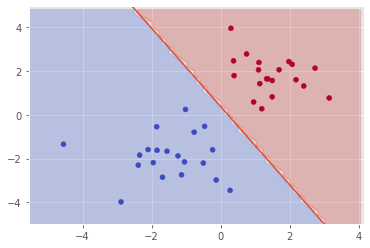

In [63]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

<a id="31"></a> <br>
## 20- Exercises
let's do some exercise.

In [64]:
# Students may (probably should) ignore this code. It is just here to make pretty arrows.

def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

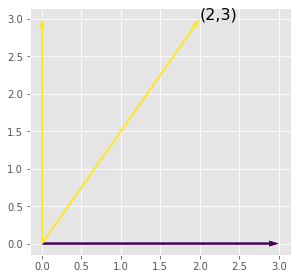

In [65]:
# Again, this code is not intended as a coding example.

a1 = np.array([3,0])         # axis
a2 = np.array([0,3])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([a1,v1])
plt.text(2,3,"(2,3)",fontsize=16)
plt.tight_layout()


5


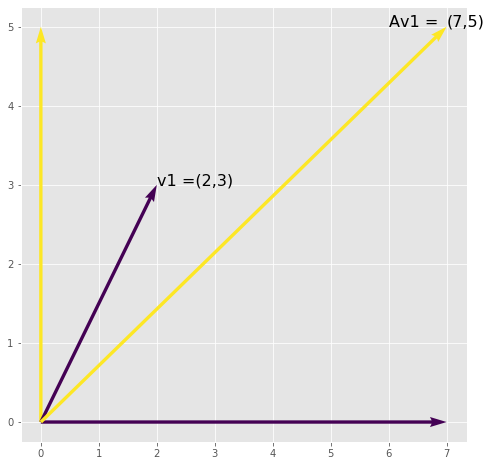

In [66]:
#Matrices, Transformations and Geometric Interpretation
a1 = np.array([7,0])         # axis
a2 = np.array([0,5])

A = np.array([[2,1],[1,1]])  # transformation f in standard basis
v2 =np.dot(A,v1)
plt.figure(figsize=(8,8))
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([v1,v2])
plt.text(2,3,"v1 =(2,3)",fontsize=16)
plt.text(6,5,"Av1 = ", fontsize=16)
plt.text(v2[0],v2[1],"(7,5)",fontsize=16)
print(v2[1])

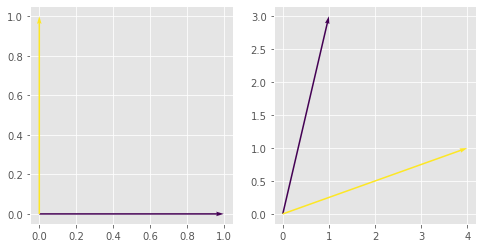

In [67]:
#Change to a Different Basis
e1 = np.array([1,0])
e2 = np.array([0,1])
B = np.array([[1,4],[3,1]])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([B.dot(e1), B.dot(e2)])
plt.Circle((0,0),2)
#plt.show()
#plt.tight_layout()

<function matplotlib.patches.Patch.draw(self, renderer)>

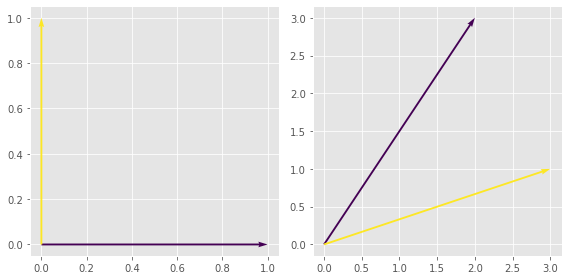

In [68]:
#Inner Products 
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,3],[3,1]])
v1=A.dot(e1)
v2=A.dot(e2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([v1,v2])
plt.tight_layout()
#help(plt.Circle)
plt.Circle(np.array([0,0]),radius=1)
plt.Circle.draw

In [69]:
# using sqrt() to print the square root of matrix 
print ("The element wise square root is : ") 
print (np.sqrt(x)) 

The element wise square root is : 
[1.     1.4142 1.7321]


<a id="32"></a> <br>
# 21-Conclusion
If you have made this far – give yourself a pat at the back. We have covered different aspects of **Linear algebra** in this Kernel. You are now finishing the **third step** of the course to continue, return to the [**main page**](https://www.kaggle.com/mjbahmani/10-steps-to-become-a-data-scientist/) of the course.  

###### [Go to top](#top)